## Importing the necessary libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics # evolution of models
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression

## Load the dataset into dataframe

In [2]:
titanic=pd.read_csv(r"C:\Users\LENOVO\Downloads\titanic.csv")

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.shape

(891, 12)

## EDA : Exploratory Data Analysis

In [5]:
titanic["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
for i in titanic.columns:
    print(f"Feature {i} has a unique count of {titanic[i].nunique()}") 

Feature PassengerId has a unique count of 891
Feature Survived has a unique count of 2
Feature Pclass has a unique count of 3
Feature Name has a unique count of 891
Feature Sex has a unique count of 2
Feature Age has a unique count of 88
Feature SibSp has a unique count of 7
Feature Parch has a unique count of 7
Feature Ticket has a unique count of 681
Feature Fare has a unique count of 248
Feature Cabin has a unique count of 147
Feature Embarked has a unique count of 3


In [7]:
titanic["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [8]:
titanic["Age"].max()

80.0

In [9]:
titanic["Age"].min()

0.42

In [11]:
titanic["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [12]:
titanic["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [13]:
# Data Dictinary
# Sibsp : number of siblings/spouses 
# Parch : number of parents/children
# Embarked : c-cherbourg, q-queenstown, s-southampton

In [14]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
titanic.describe(percentiles=[0.01,.02,.03,.04,.05,.1,.25,.50,.75,.90,.95, .96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
PassengerId,891.0,446.000000,257.353842,1.00,9.9,18.8000,27.700,36.60000,45.500,90.00,223.5000,446.0000,668.5,802.0000,846.50000,855.40,864.30,873.2000,882.10000,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0,0.0000,0.000,0.00000,0.000,0.00,0.0000,0.0000,1.0,1.0000,1.00000,1.00,1.00,1.0000,1.00000,1.0000
Pclass,891.0,2.308642,0.836071,1.00,1.0,1.0000,1.000,1.00000,1.000,1.00,2.0000,3.0000,3.0,3.0000,3.00000,3.00,3.00,3.0000,3.00000,3.0000
Age,714.0,29.699118,14.526497,0.42,1.0,2.0000,2.000,3.00000,4.000,14.00,20.1250,28.0000,38.0,50.0000,56.00000,58.00,60.61,62.7400,65.87000,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0,0.0000,0.000,0.00000,0.000,0.00,0.0000,0.0000,1.0,1.0000,3.00000,3.00,4.00,4.0000,5.00000,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0,0.0000,0.000,0.00000,0.000,0.00,0.0000,0.0000,0.0,2.0000,2.00000,2.00,2.00,2.0000,4.00000,6.0000
Fare,891.0,32.204208,49.693429,0.00,0.0,6.3975,6.975,7.05252,7.225,7.55,7.9104,14.4542,31.0,77.9583,112.07915,133.99,151.55,211.3375,249.00622,512.3292


## Univariate Analysis

In [17]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
cat_data=titanic[titanic.dtypes[titanic.dtypes=="object"].index]
num_data=titanic[titanic.dtypes[titanic.dtypes!="object"].index]

In [19]:
cat_data

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [20]:
num_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [21]:
cat_data.isnull().sum()

Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

In [22]:
num_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

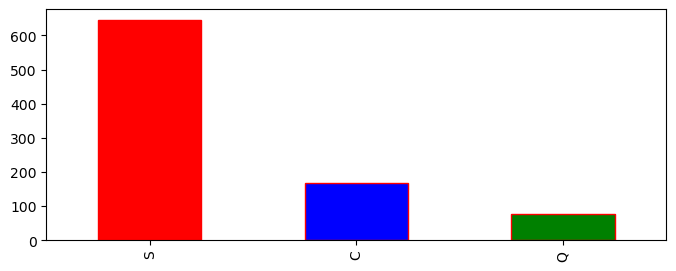

In [23]:
plt.figure(figsize=(8,3))
cat_data["Embarked"].value_counts().plot(kind="bar", color=["r","b","g"], edgecolor="r")
plt.show()

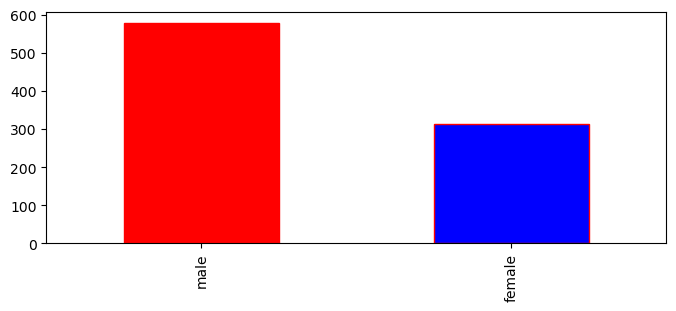

In [24]:
plt.figure(figsize=(8,3))
cat_data["Sex"].value_counts().plot(kind="bar", color=["r","b"], edgecolor="r")
plt.show()

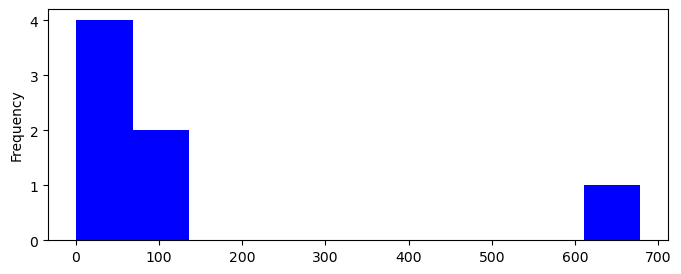

In [25]:
plt.figure(figsize=(8,3))
num_data["Parch"].value_counts().plot(kind="hist", color="b")
plt.show()

## Bivariate Analysis

## cat-cat

In [28]:
pd.crosstab(titanic["Sex"], titanic["Embarked"])

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


In [29]:
pd.crosstab(titanic["Sex"], titanic["Ticket"])

Ticket,110152,110413,110465,110564,110813,111240,111320,111361,111369,111426,...,STON/O2. 3101290,SW/PP 751,W./C. 14258,W./C. 14263,W./C. 6607,W./C. 6608,W./C. 6609,W.E.P. 5734,W/C 14208,WE/P 5735
Sex,,,,,,,,,,,,,,,,,,,,,
female,3,2,0,0,1,0,0,2,0,0,...,1,0,1,0,1,3,1,0,0,1
male,0,1,2,1,0,1,1,0,1,1,...,0,1,0,1,1,1,0,1,1,1


## cat-num

In [31]:
titanic.groupby(["Sex"]).agg({"Survived":["min", "max", "mean", "count"]})

Survived                    
            min max      mean count
Sex                                
female        0   1  0.742038   314
male          0   1  0.188908   577

In [32]:
titanic.groupby(["Embarked"]).agg({"Survived":["min", "max", "mean", "count"]})

Survived                    
              min max      mean count
Embarked                             
C               0   1  0.553571   168
Q               0   1  0.389610    77
S               0   1  0.336957   644

In [33]:
titanic.groupby(["Embarked"]).agg({"Pclass":["min", "max", "mean", "count"]})

Pclass                    
            min max      mean count
Embarked                           
C             1   3  1.886905   168
Q             1   3  2.909091    77
S             1   3  2.350932   644

## num-num

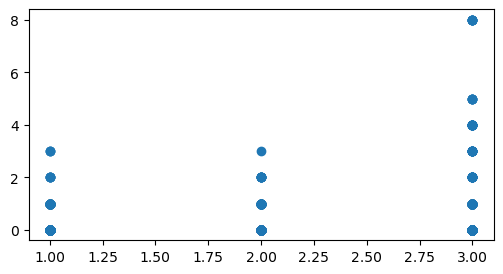

In [35]:
plt.figure(figsize=(6,3))
plt.scatter(titanic["Pclass"], titanic["SibSp"])
plt.show()

In [36]:
titanic[["Survived", "Pclass"]].corr()

,Survived,Pclass
Survived,1.000000,-0.338481
Pclass,-0.338481,1.000000


In [37]:
titanic[["Survived", "Parch"]].corr()

,Survived,Parch
Survived,1.000000,0.081629
Parch,0.081629,1.000000


<Figure size 800x300 with 0 Axes>

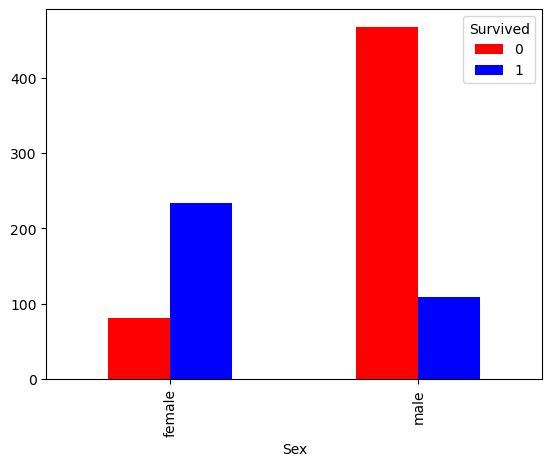

In [38]:
plt.figure(figsize=(8,3))
data=pd.crosstab(titanic["Sex"], titanic["Survived"])
data.plot(kind="bar", color=["r","b"])
plt.show()

In [39]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [40]:
cat_data.drop(["Cabin"], axis=1, inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22692\4073132578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data.drop(["Cabin"], axis=1, inplace=True)


## Missing Value

In [41]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [42]:
num_data.fillna(num_data.median(), inplace=True) # Filling median value

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22692\3886695832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data.fillna(num_data.median(), inplace=True) # Filling median value


In [43]:
cat_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [44]:
col=cat_data["Embarked"]
col=col.fillna(col.mode()[0], inplace = True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22692\2557189169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col=col.fillna(col.mode()[0], inplace = True)


In [45]:
cat_data.isnull().sum()

Name        0
Sex         0
Ticket      0
Embarked    0
dtype: int64

In [50]:
num_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

## Outlier Treatment

In [52]:
titanic.describe(percentiles=[0.01,.02,.03,.04,.05,.1,.25,.50,.75,.90,.95, .96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
PassengerId,891.0,446.000000,257.353842,1.00,9.9,18.8000,27.700,36.60000,45.500,90.00,223.5000,446.0000,668.5,802.0000,846.50000,855.40,864.30,873.2000,882.10000,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0,0.0000,0.000,0.00000,0.000,0.00,0.0000,0.0000,1.0,1.0000,1.00000,1.00,1.00,1.0000,1.00000,1.0000
Pclass,891.0,2.308642,0.836071,1.00,1.0,1.0000,1.000,1.00000,1.000,1.00,2.0000,3.0000,3.0,3.0000,3.00000,3.00,3.00,3.0000,3.00000,3.0000
Age,714.0,29.699118,14.526497,0.42,1.0,2.0000,2.000,3.00000,4.000,14.00,20.1250,28.0000,38.0,50.0000,56.00000,58.00,60.61,62.7400,65.87000,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0,0.0000,0.000,0.00000,0.000,0.00,0.0000,0.0000,1.0,1.0000,3.00000,3.00,4.00,4.0000,5.00000,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0,0.0000,0.000,0.00000,0.000,0.00,0.0000,0.0000,0.0,2.0000,2.00000,2.00,2.00,2.0000,4.00000,6.0000
Fare,891.0,32.204208,49.693429,0.00,0.0,6.3975,6.975,7.05252,7.225,7.55,7.9104,14.4542,31.0,77.9583,112.07915,133.99,151.55,211.3375,249.00622,512.3292


In [53]:
def outliercapM1(x):
  x=x.clip(upper=x.quantile(.99))
  # x=x.clip(lower=x.quantile(.01))
  return x

In [55]:
num_data=num_data.apply(outliercapM1)

In [56]:
num_data.describe(percentiles=[0.01,.02,.03,.04,.05,.1,.25,.50,.75,.90,.95, .96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
PassengerId,891.0,445.949596,257.267712,1.00,9.9,18.8000,27.700,36.60000,45.500,90.00,223.5000,446.0000,668.5,802.0000,846.50000,855.40,864.30,873.2000,882.001000,882.010000
Survived,891.0,0.383838,0.486592,0.00,0.0,0.0000,0.000,0.00000,0.000,0.00,0.0000,0.0000,1.0,1.0000,1.00000,1.00,1.00,1.0000,1.000000,1.000000
Pclass,891.0,2.308642,0.836071,1.00,1.0,1.0000,1.000,1.00000,1.000,1.00,2.0000,3.0000,3.0,3.0000,3.00000,3.00,3.00,3.0000,3.000000,3.000000
Age,891.0,29.302660,12.836996,0.42,1.0,2.0000,3.000,4.00000,6.000,16.00,22.0000,28.0000,35.0,47.0000,54.00000,56.00,59.00,62.0000,65.000000,65.000000
SibSp,891.0,0.499439,0.966140,0.00,0.0,0.0000,0.000,0.00000,0.000,0.00,0.0000,0.0000,1.0,1.0000,3.00000,3.00,4.00,4.0000,5.000000,5.000000
Parch,891.0,0.373737,0.763306,0.00,0.0,0.0000,0.000,0.00000,0.000,0.00,0.0000,0.0000,0.0,2.0000,2.00000,2.00,2.00,2.0000,4.000000,4.000000
Fare,891.0,31.211263,42.455043,0.00,0.0,6.3975,6.975,7.05252,7.225,7.55,7.9104,14.4542,31.0,77.9583,112.07915,133.99,151.55,211.3375,247.535654,247.669342


In [58]:
final_data=pd.concat([cat_data, num_data], axis=1)

In [59]:
final_data.isnull().sum()

Name           0
Sex            0
Ticket         0
Embarked       0
PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [60]:
final_data.columns

Index(['Name', 'Sex', 'Ticket', 'Embarked', 'PassengerId', 'Survived',
       'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'],
      dtype='object')

In [61]:
cor=final_data[['Name', 'Sex', 'Ticket', 'Embarked', 'PassengerId', 'Survived',
       'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22692\4244745660.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()


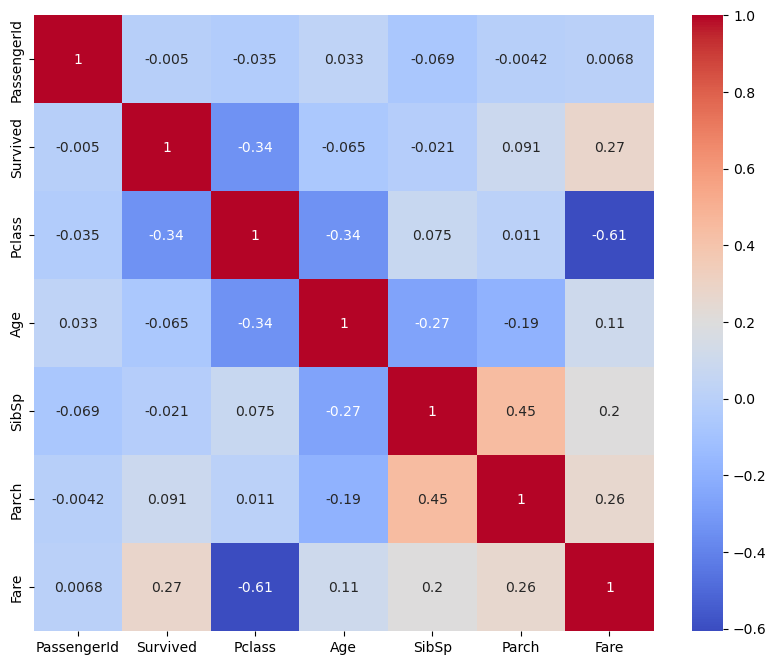

In [62]:
plt.figure(figsize=(10,8))
sns.heatmap(cor, annot=True, cmap="coolwarm")
plt.show()

In [63]:
final_data.dtypes

Name            object
Sex             object
Ticket          object
Embarked        object
PassengerId    float64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

In [64]:
final_data.columns

Index(['Name', 'Sex', 'Ticket', 'Embarked', 'PassengerId', 'Survived',
       'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'],
      dtype='object')

## Logistic Regression Algorithm

In [65]:
y=final_data["Survived"]

In [66]:
x=final_data[['PassengerId', 
       'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.3, random_state=88)

In [68]:
logR=LogisticRegression()

In [69]:
logR.fit(x_train, y_train)

C:\Users\LENOVO\Documents\New folder\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## evaluation of model / performance of model

In [71]:
logR.score(x_train,y_train) # accuracy of model

0.6934189406099518

In [72]:
pred_train=logR.predict(x_train) # it predicts 1 and 0 (1 when prob > 0.05, 0 when prob < 0.5 )

In [73]:
pred_test=logR.predict(x_test)

In [74]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.70      0.87      0.77       374
           1       0.68      0.43      0.53       249

    accuracy                           0.69       623
   macro avg       0.69      0.65      0.65       623
weighted avg       0.69      0.69      0.68       623



In [81]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       175
           1       0.68      0.54      0.60        93

    accuracy                           0.75       268
   macro avg       0.73      0.70      0.71       268
weighted avg       0.74      0.75      0.74       268



In [76]:
prob_train=pd.DataFrame(logR.predict_proba(x_train), columns=["prob0", "prob1"])
new_pred_train=np.where(prob_train["prob1"]>=.47,1,0)
new_pred_train

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,

In [77]:
print(metrics.classification_report(y_train, new_pred_train))

              precision    recall  f1-score   support

           0       0.71      0.83      0.76       374
           1       0.66      0.48      0.55       249

    accuracy                           0.69       623
   macro avg       0.68      0.66      0.66       623
weighted avg       0.69      0.69      0.68       623



In [98]:
prob_test=pd.DataFrame(logR.predict_proba(x_test), columns=["prob0","prob1"])
new_pred_test=np.where(prob_test["prob1"]>.48,1,0)
new_pred_test

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1])

In [99]:
print(metrics.classification_report(y_test, new_pred_test))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       175
           1       0.66      0.56      0.60        93

    accuracy                           0.75       268
   macro avg       0.72      0.70      0.71       268
weighted avg       0.74      0.75      0.74       268



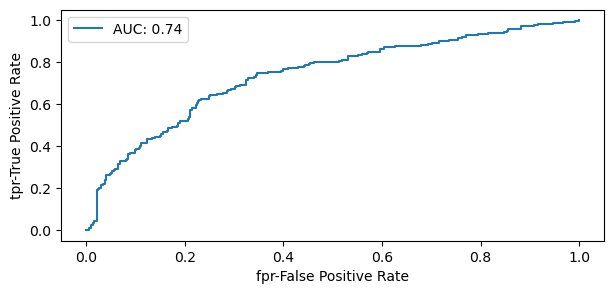

In [135]:
plt.figure(figsize=(7,3))
fpr, tpr, threesholds = metrics.roc_curve(y_train, prob_train["prob1"])
Auc=metrics.roc_auc_score(y_train, prob_train["prob1"])
plt.plot(fpr, tpr, label=f"AUC: "+str(round(Auc,2)))
plt.xlabel("fpr-False Positive Rate")
plt.ylabel("tpr-True Positive Rate")
plt.legend()
plt.show()

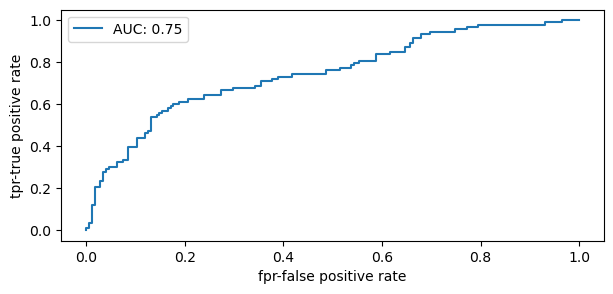

In [138]:
plt.figure(figsize=(7,3))
fpr, trp, threeshold = metrics.roc_curve(y_test,prob_test["prob1"])
Auc=metrics.roc_auc_score(y_test,prob_test["prob1"])
plt.plot(fpr, tpr, label=f"AUC: "+str(round(Auc,2)))
plt.xlabel("fpr-false positive rate")
plt.ylabel("tpr-true positive rate")
plt.legend()
plt.show()

## KS Value

In [139]:
def profile_decile(X,y,trained_model):
    X_1=X.copy()
    y_1=y.copy()
    y_pred1=trained_model.predict(X_1)
    X_1["Prob_Event"]=trained_model.predict_proba(X_1)[:,1]
    X_1["Y_actual"]=y_1
    X_1["Y_pred"]=y_pred1
    X_1["Rank"]=pd.qcut(X_1["Prob_Event"], 10, labels=np.arange(0,10,1))
    X_1["numb"]=10
    X_1["Decile"]=X_1["numb"]-X_1["Rank"].astype("int")

    profile=pd.DataFrame(X_1.groupby("Decile") \
                         .apply(lambda x: pd.Series({
        'min_score'   : x["Prob_Event"].min(),
        'max_score'   : x["Prob_Event"].max(),
        'Event'       : x['Y_actual'][x["Y_actual"]==1].count(),
        'Non_event'   : x["Y_actual"].count()-x["Y_actual"].sum(),
        'Total'       : x["Y_actual"].count() })))
    tr_prof=profile
    total_fraud=tr_prof['Event'].sum()
    total_Non_fraud=tr_prof['Non_event'].sum()
    tr_prof['event_Rate']=tr_prof['Event']/tr_prof['Total']
    tr_prof['event_%']=(tr_prof['Event']/total_fraud)*100
    tr_prof['Non_event_%']=(tr_prof['Non_event']/total_Non_fraud)*100
    tr_prof['cuml_event']=np.cumsum(tr_prof['event_%'])
    tr_prof['cuml_Non_event']=np.cumsum(tr_prof['Non_event_%'])
    tr_prof['Difference']=round(tr_prof['cuml_event']-tr_prof['cuml_Non_event'],2)
#     tr_prof['Random']=10
#     tr_prof['cuml_Random']=np.cumsum(tr_prof['Random'])
#     tr_prof['Lift']=tr_prof['cuml_Fraud']/tr_prof['cuml_Random']
    return tr_prof

In [140]:
profile_decile(x_train, y_train, logR)

,min_score,max_score,Event,Non_event,Total,event_Rate,event_%,Non_event_%,cuml_event,cuml_Non_event,Difference
Decile,,,,,,,,,,,
1,0.666114,0.956767,52.0,11.0,63.0,0.825397,20.883534,2.941176,20.883534,2.941176,17.94
2,0.561246,0.665022,39.0,23.0,62.0,0.629032,15.662651,6.149733,36.546185,9.090909,27.46
3,0.459787,0.561115,31.0,31.0,62.0,0.500000,12.449799,8.288770,48.995984,17.379679,31.62
4,0.389157,0.459202,34.0,28.0,62.0,0.548387,13.654618,7.486631,62.650602,24.866310,37.78
5,0.333803,0.385145,26.0,36.0,62.0,0.419355,10.441767,9.625668,73.092369,34.491979,38.60
6,0.295980,0.333493,17.0,46.0,63.0,0.269841,6.827309,12.299465,79.919679,46.791444,33.13
7,0.272411,0.295884,14.0,48.0,62.0,0.225806,5.622490,12.834225,85.542169,59.625668,25.92
8,0.259578,0.272394,11.0,51.0,62.0,0.177419,4.417671,13.636364,89.959839,73.262032,16.70
9,0.217989,0.259465,14.0,48.0,62.0,0.225806,5.622490,12.834225,95.582329,86.096257,9.49


## Linear Regression Algorithm

In [100]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=.3, random_state=88)

In [101]:
x_train.shape

(623, 6)

In [102]:
y_train.shape

(623,)

In [104]:
x_test.shape

(268, 6)

In [106]:
y_test.shape

(268,)

In [110]:
x_train.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [111]:
import statsmodels.api as sm
x_train1=x_train[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
x_train1=sm.add_constant(x_train1)
model=sm.OLS(y_train, x_train1)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     20.55
Date:                Fri, 09 Feb 2024   Prob (F-statistic):           5.38e-22
Time:                        09:40:44   Log-Likelihood:                -382.53
No. Observations:                 623   AIC:                             779.1
Df Residuals:                     616   BIC:                             810.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.1731      0.109     10.758      

In [112]:
line=LinearRegression()

In [113]:
line.fit(x_train,y_train)

LinearRegression()

In [114]:
line.coef_

array([-4.70306467e-05, -2.31303038e-01, -7.69395861e-03, -3.20857194e-02,
        3.46235766e-02,  5.25750477e-04])

In [115]:
line.intercept_ # constant

1.1731424139712197

In [116]:
pred_train=line.predict(x_train)

In [117]:
pred_train

array([ 0.23067578,  0.73136097,  0.37925891,  0.86832209,  0.35924694,
        0.28485547,  0.69767287,  0.23166207,  0.20775538,  0.32025616,
        0.28284983,  0.22602475,  0.23107114,  0.24628211,  0.70579451,
        0.63932983,  0.74394836,  0.24258291,  0.24910937,  0.77214617,
        0.51152093,  0.2639932 ,  0.54793482,  0.29808224,  0.28490744,
        0.65411888,  0.38681473,  0.72104275,  0.59828496,  0.35443839,
        0.28746733,  0.75260313,  0.25106095,  0.26410034,  0.12026853,
        0.70688139,  0.70520453,  0.25741881,  0.0717745 ,  0.76835289,
        0.30736242,  0.22381466,  0.3005726 ,  0.77381692,  0.34243969,
        0.44231805,  0.81817687,  0.22848445,  0.43448597,  0.29138297,
        0.30963909,  0.55330313,  0.33413923,  0.35138702,  0.50635455,
        0.25667264,  0.52232291,  0.26050377,  0.20690159,  0.68189769,
        0.65455081,  0.26587134,  0.193902  ,  0.29026174,  0.56340515,
        0.50584252,  0.34996848,  0.77621754,  0.22269968,  0.60

In [118]:
mse=np.mean((pred_train-y_train)**(2))

In [119]:
mse

0.19991632109138713

In [120]:
mse_test=np.mean((pred_test-y_test)**(2))

In [121]:
mse_test

0.25

In [123]:
rmse_train=np.sqrt(np.mean((pred_train-y_train)**(2)))

In [124]:
rmse_train

0.4471200298481238

In [125]:
rmse_test=np.sqrt(np.mean((pred_test-y_test)**(2)))

In [126]:
rmse_test

0.5

In [127]:
mae_train=np.mean(abs((pred_train-y_train)))

In [130]:
mae_train

0.4000152649161228

In [128]:
mae_test=np.mean(abs((pred_test-y_test)))

In [129]:
mae_test

0.25

In [131]:
mape_train=np.mean(abs((pred_train-y_train)/y_train))

In [134]:
mape_train

inf

In [132]:
mape_test=np.mean(abs((pred_test-y_test)/y_test))

In [133]:
mape_test

inf